## This file will help you design neural networks with torchview

## Install torchview and related packages
### conda activate pytorch_env_name 
### conda install graphviz python-graphviz
### conda install -c conda-forge torchview 

## Do NOT submit this file as this file will NOT be graded

In [1]:
import torchview
from torchview import draw_graph

In [2]:
torchview.__version__

'0.2.6'

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as nnF
from torch.utils.data import DataLoader as torch_dataloader
from torch.utils.data import Dataset as torch_dataset
import torch.optim as optim
import platform, socket, getpass
from time import time

In [4]:
torch.__version__

'2.5.1'

In [5]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=187, out_features=512) 
        self.norm2 = nn.LayerNorm(normalized_shape=512)
        self.linear2 = nn.Linear(in_features=512, out_features=5)
                
    def forward(self, x):
        x1=nnF.relu(self.linear1(x))
        print("x1", x1.shape)
        z=self.linear2(self.norm2(x1))
        print("z", z.shape)
        return z

In [6]:
#debug your network here
model=MLP()
x=torch.rand(10,187)
z=model(x)
print(z.shape) # (10,5)

x1 torch.Size([10, 512])
z torch.Size([10, 5])
torch.Size([10, 5])



(process:6208): Pango-WARNING **: 20:47:43.280: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


x1 torch.Size([1, 512])
z torch.Size([1, 5])


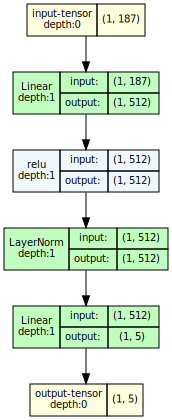

In [7]:
model_graph = draw_graph(MLP(), input_size=(1, 187), device='meta')
model_graph.visual_graph

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)      
        self.norm2 = nn.GroupNorm(num_groups=1, num_channels=16)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=16, kernel_size=5, stride=2, padding=2)        
        self.avg1=torch.nn.AvgPool1d(kernel_size=2, stride=2, padding=1)
        self.fc1 = nn.Linear(in_features=768, out_features=5)
    def forward(self, x):
        x1=nnF.relu(self.conv1(x))
        print("x1", x1.shape)
        x2=nnF.relu(self.norm2(self.conv2(x1)))
        print("x2", x2.shape)
        x3=self.avg1(x2)
        print("x3", x3.shape)
        x3r=x3.reshape(x3.shape[0], -1)
        print("x3r", x3r.shape)
        z=self.fc1(x3r)
        print("z", z.shape)
        return z

In [9]:
#debug your network here
model=CNN()
x=torch.rand(10,1,187)
z=model(x)
print(z.shape) # (10,5)

x1 torch.Size([10, 16, 187])
x2 torch.Size([10, 16, 94])
x3 torch.Size([10, 16, 48])
x3r torch.Size([10, 768])
z torch.Size([10, 5])
torch.Size([10, 5])



(process:23792): Pango-WARNING **: 20:47:43.380: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


x1 torch.Size([1, 16, 187])
x2 torch.Size([1, 16, 94])
x3 torch.Size([1, 16, 48])
x3r torch.Size([1, 768])
z torch.Size([1, 5])


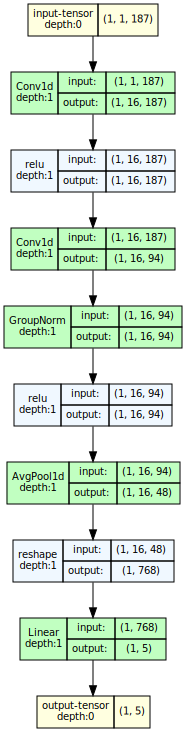

In [10]:
model_graph = draw_graph(CNN(), input_size=(1,1,187), device='meta')
model_graph.visual_graph